In [12]:
# Get data and dependencies

! git clone https://www.github.com/DS3001/group16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

fatal: destination path 'group16' already exists and is not an empty directory.


In [29]:
# Create Training and Testing DataFrames

train = pd.read_csv('/content/group16/project_2/cleaned_data/c_train.csv')
test = pd.read_csv('/content/group16/project_2/cleaned_data/c_test.csv')

columns = train.columns
all_metrics = columns[1:-1]
no_poly = columns[1:23]
no_poly

X_train = train[all_metrics]
y_train = train['stroke']
X_test = test[all_metrics]
y_test = test['stroke']

X_train_np = train[no_poly]
X_test_np = test[no_poly]

X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,log_glucose,gender_Female,gender_Male,gender_Other,ever_married_No,...,hypertension^2,hypertension heart_disease,hypertension avg_glucose_level,hypertension bmi,heart_disease^2,heart_disease avg_glucose_level,heart_disease bmi,avg_glucose_level^2,avg_glucose_level bmi,bmi^2
0,0.706745,1.0,0.0,0.157026,0.519700,4.476882,0,1,0,0,...,1.0,0.0,87.96,39.200000,0.0,0.0,0.0,7736.9616,3448.032000,1536.640000
1,0.095797,0.0,0.0,0.267102,0.114447,4.708539,1,0,0,1,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,12296.5921,1951.664000,309.760000
2,0.853372,0.0,0.0,0.066199,0.457786,4.234686,1,0,0,0,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,4766.5216,2478.536000,1288.810000
3,0.572336,0.0,0.0,0.747444,0.724203,5.351621,1,0,0,0,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,44499.9025,10568.595000,2510.010000
4,0.902248,1.0,0.0,0.722913,0.808630,5.327099,1,0,0,0,...,1.0,0.0,205.84,54.600000,0.0,0.0,0.0,42370.1056,11238.864000,2981.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.902248,0.0,0.0,0.027507,0.324063,4.110546,0,1,0,0,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,3718.5604,1754.551867,827.861302
1019,0.890029,0.0,0.0,0.075320,0.429644,4.261834,1,0,0,0,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,5032.4836,2440.336000,1183.360000
1020,0.694526,0.0,0.0,0.149057,0.378987,4.457830,0,1,0,0,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,7447.6900,2735.710000,1004.890000
1021,0.914467,0.0,0.0,0.113053,0.333959,4.366913,1,0,0,0,...,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,6209.4400,2308.840000,858.490000


In [30]:
# Create and test trees of different max depths
for i in range(1,100):
  model = tree.DecisionTreeClassifier(max_depth=i)
  cart = model.fit(X_train, y_train)

  prediction = cart.predict(X_test)
  r2 = r2_score(y_test,prediction)
  RMSE = np.sqrt(mean_squared_error(y_test,prediction))
  print('Max Depth: ' + str(i))
  print('R-squared: ' + str(r2))
  print('RMSE: ' + str(RMSE))

Max Depth: 1
R-squared: -0.05138746145940387
RMSE: 0.22107884414269094
Max Depth: 2
R-squared: -0.05138746145940387
RMSE: 0.22107884414269094
Max Depth: 3
R-squared: -0.05138746145940387
RMSE: 0.22107884414269094
Max Depth: 4
R-squared: -0.11447070914696811
RMSE: 0.2276146011290056
Max Depth: 5
R-squared: -0.19858170606372028
RMSE: 0.2360476118780145
Max Depth: 6
R-squared: -0.24063720452209636
RMSE: 0.24015309551703162
Max Depth: 7
R-squared: -0.24063720452209636
RMSE: 0.24015309551703162
Max Depth: 8
R-squared: -0.3457759506680369
RMSE: 0.25012215979228897
Max Depth: 9
R-squared: -0.5139979445015415
RMSE: 0.26529461297122914
Max Depth: 10
R-squared: -0.4509146968139772
RMSE: 0.2597088376469044
Max Depth: 11
R-squared: -0.4929701952723533
RMSE: 0.2634458475000221
Max Depth: 12
R-squared: -0.5770811921891057
RMSE: 0.27076518053694115
Max Depth: 13
R-squared: -0.6191366906474818
RMSE: 0.2743516305843672
Max Depth: 14
R-squared: -0.5350256937307296
RMSE: 0.2671305837565284
Max Depth: 15


In [28]:
# Create and test trees of different max depths without the polynomials
for i in range(1,20):
  model = tree.DecisionTreeClassifier(max_depth=i)
  cart = model.fit(X_train_np, y_train)

  prediction = cart.predict(X_test_np)
  r2 = r2_score(y_test,prediction)
  RMSE = np.sqrt(mean_squared_error(y_test,prediction))
  print('Max Depth: ' + str(i))
  print('R-squared: ' + str(r2))
  print('RMSE: ' + str(RMSE))

Max Depth: 1
R-squared: -0.05138746145940387
RMSE: 0.22107884414269094
Max Depth: 2
R-squared: -0.05138746145940387
RMSE: 0.22107884414269094
Max Depth: 3
R-squared: -0.05138746145940387
RMSE: 0.22107884414269094
Max Depth: 4
R-squared: -0.05138746145940387
RMSE: 0.22107884414269094
Max Depth: 5
R-squared: -0.0724152106885918
RMSE: 0.2232786878186487
Max Depth: 6
R-squared: -0.4509146968139772
RMSE: 0.2597088376469044
Max Depth: 7
R-squared: -0.3457759506680369
RMSE: 0.25012215979228897
Max Depth: 8
R-squared: -0.8294141829393626
RMSE: 0.2916230242449912
Max Depth: 9
R-squared: -0.5981089414182938
RMSE: 0.27256430451867997
Max Depth: 10
R-squared: -0.7663309352517984
RMSE: 0.28655093255850106
Max Depth: 11
R-squared: -0.7663309352517984
RMSE: 0.28655093255850106
Max Depth: 12
R-squared: -0.8714696813977387
RMSE: 0.29495596702371263
Max Depth: 13
R-squared: -0.8083864337101745
RMSE: 0.28994218589788784
Max Depth: 14
R-squared: -1.0817471736896196
RMSE: 0.3110855084191276
Max Depth: 15
R

[Text(0.5, 0.875, 'x[0] <= 0.823\ngini = 0.093\nsamples = 4087\nvalue = [3888, 199]'),
 Text(0.25, 0.625, 'x[32] <= 208.955\ngini = 0.046\nsamples = 3403\nvalue = [3323, 80]'),
 Text(0.125, 0.375, 'x[0] <= 0.591\ngini = 0.043\nsamples = 3389\nvalue = [3315, 74]'),
 Text(0.0625, 0.125, 'gini = 0.012\nsamples = 2256\nvalue = [2242, 14]'),
 Text(0.1875, 0.125, 'gini = 0.1\nsamples = 1133\nvalue = [1073, 60]'),
 Text(0.375, 0.375, 'x[18] <= 0.5\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.3125, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.625, 'x[29] <= 240.525\ngini = 0.287\nsamples = 684\nvalue = [565, 119]'),
 Text(0.625, 0.375, 'x[22] <= 5852.5\ngini = 0.28\nsamples = 677\nvalue = [563, 114]'),
 Text(0.5625, 0.125, 'gini = 0.219\nsamples = 336\nvalue = [294, 42]'),
 Text(0.6875, 0.125, 'gini = 0.333\nsamples = 341\nvalue = [269, 72]'),
 Text(0.875, 0.375, 'x[29] <= 251.245\ngini = 0.408\nsa

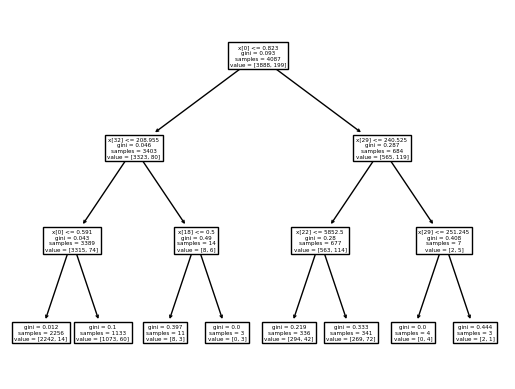

In [16]:
model = tree.DecisionTreeClassifier(max_depth=3)
cart = model.fit(X_train, y_train)

prediction = cart.predict(X_test)
r2 = r2_score(y_test,prediction)
RMSE = np.sqrt(mean_squared_error(y_test,prediction))

tree.plot_tree(cart)